<a href="https://colab.research.google.com/github/sengupta-arijit-rij/Machine-Learning/blob/WorkingBranch/PT_DS_Chi2_Tests_Assignment_ArijitSengupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import pandas as pd
import numpy as np


Task 1:

In [3]:
# Load dataset
data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/Slasher.csv'
df_slasher=pd.read_csv(data_url)

In [4]:
df_slasher.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


Task 2:

In [7]:
gender_frequencies= df_slasher['Gender'].value_counts(normalize=True)
gender_frequencies.head()

0    0.542268
1    0.457732
Name: Gender, dtype: float64

In [16]:
f_percent= gender_frequencies[1]*100
m_percent= gender_frequencies[0]*100
print('Male: '+str(m_percent) +'%   Female: ' + str(f_percent) + '%')

Male: 54.22680412371134%   Female: 45.77319587628866%


Task 3:

In [18]:
survival_frequencies= df_slasher['Survival'].value_counts(normalize=True)
survival_frequencies

0    0.824742
1    0.175258
Name: Survival, dtype: float64

In [20]:
survival=survival_frequencies[1]*100
survival

17.525773195876287

Task 4:


In [23]:
survival_fm_crosstab=pd.crosstab(index=df_slasher['Survival'], columns=df_slasher['Gender'])
survival_fm_crosstab

Gender,0,1
Survival,,
0,228,172
1,35,50


Task 5:

In [24]:
survival_fm_margins=pd.crosstab(index=df_slasher['Survival'], columns=df_slasher['Gender'],margins=True)
survival_fm_margins

Gender,0,1,All
Survival,,,
0,228,172,400
1,35,50,85
All,263,222,485


Task 6:


In [28]:
survival_fm_crosstab_norm=  pd.crosstab(index=df_slasher['Survival'], columns=df_slasher['Gender'],normalize=True,margins=True)*100
survival_fm_crosstab_norm

Gender,0,1,All
Survival,,,
0,47.010309,35.463918,82.474227
1,7.216495,10.309278,17.525773
All,54.226804,45.773196,100.000000


Task 7:

Answer = 'B'

B:  H0 : Character sex and survival are unrelated vs.  Ha : Character sex and survival are related$

Task 8:

In [30]:
from scipy.stats import chi2_contingency
x2_statistic, pvalue, dof, expctd= chi2_contingency(pd.crosstab(index=df_slasher['Survival'], columns=df_slasher['Gender']))
pvalue

0.011104692591139978

Task 9:

In [34]:
if(pvalue<0.05):
  print('A: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related')
else:
  print('C: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are unrelated.')

A: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related


Task 10:

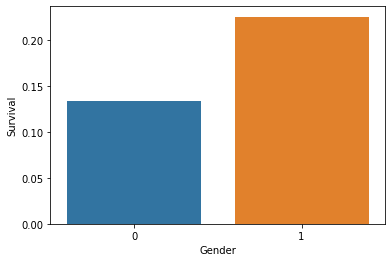

In [35]:
import seaborn as sns
sns.barplot(data=df_slasher, x='Gender', y='Survival', ci=None)